In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 7.3 Fig 23 Precision

This figure is built based on values highlighted in orange, under 'Overall Precision from all the tables types in each Companion specification' column in the uploaded 7.3 Precision Analysis excel file

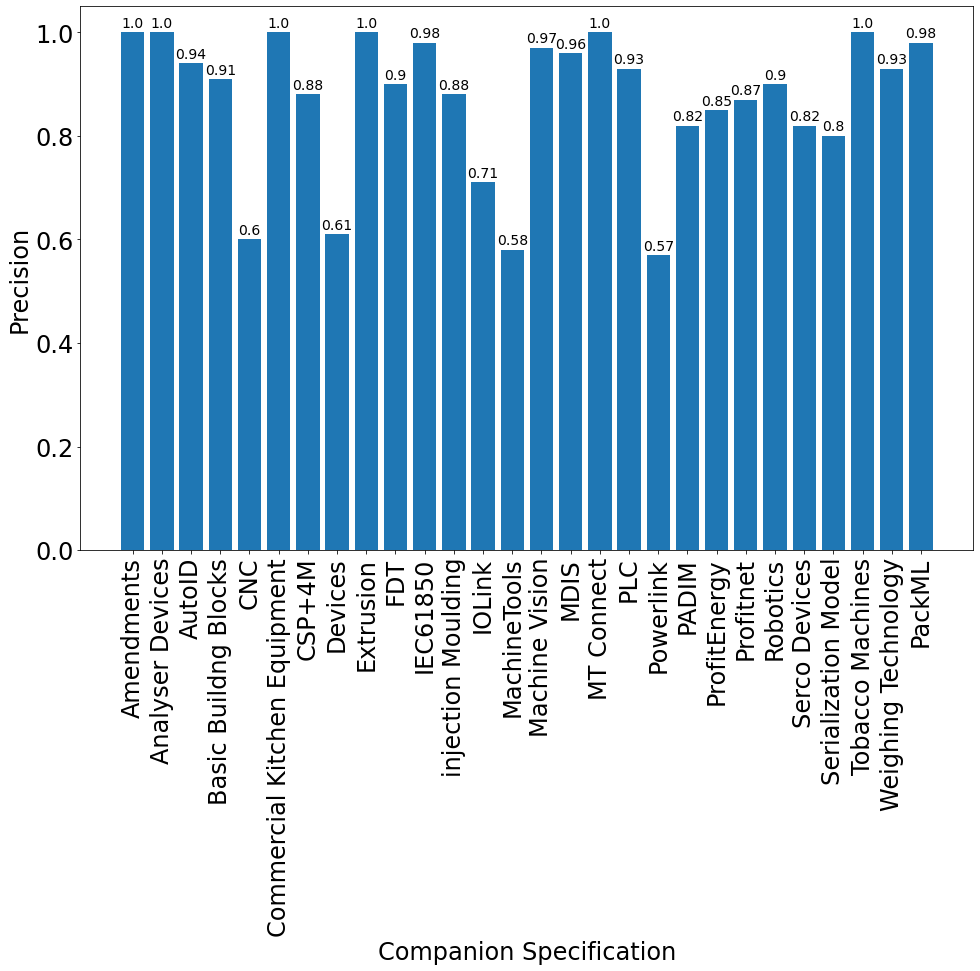

In [3]:
specs= ["Amendments", "Analyser Devices", "AutoID","Basic Buildng Blocks","CNC", "Commercial Kitchen Equipment","CSP+4M","Devices",
       "Extrusion","FDT","IEC61850","injection Moulding","IOLink","MachineTools","Machine Vision","MDIS","MT Connect","PLC","Powerlink",
       "PADIM","ProfitEnergy", "Profitnet","Robotics","Serco Devices","Serialization Model","Tobacco Machines","Weighing Technology","PackML"]
values = [1,1,0.94,0.91,0.6,1,0.88,0.61,1,0.9,0.98,0.88,0.71,0.58,0.97,0.96,1,0.93,0.57,0.82,0.85,0.87,0.9,0.82,0.8,1,0.93,0.98]
y = np.array(values)
plt.figure(figsize=(16,10))
font = {'size' : 24} # Change font size here
plt.rc('font', **font)

plt.bar(specs,values)
plt.xlabel('Companion Specification')
plt.ylabel('Precision')
plt.xticks(rotation='vertical')
for i in range(len(specs)):
        plt.text(i,y[i]+0.01,y[i], ha = 'center',fontsize=14)
plt.savefig("precision_extraction.png",bbox_inches='tight')

plt.show()

## 7.3.1 Table extraction and categorization

### Fig 24. Recall Analysis

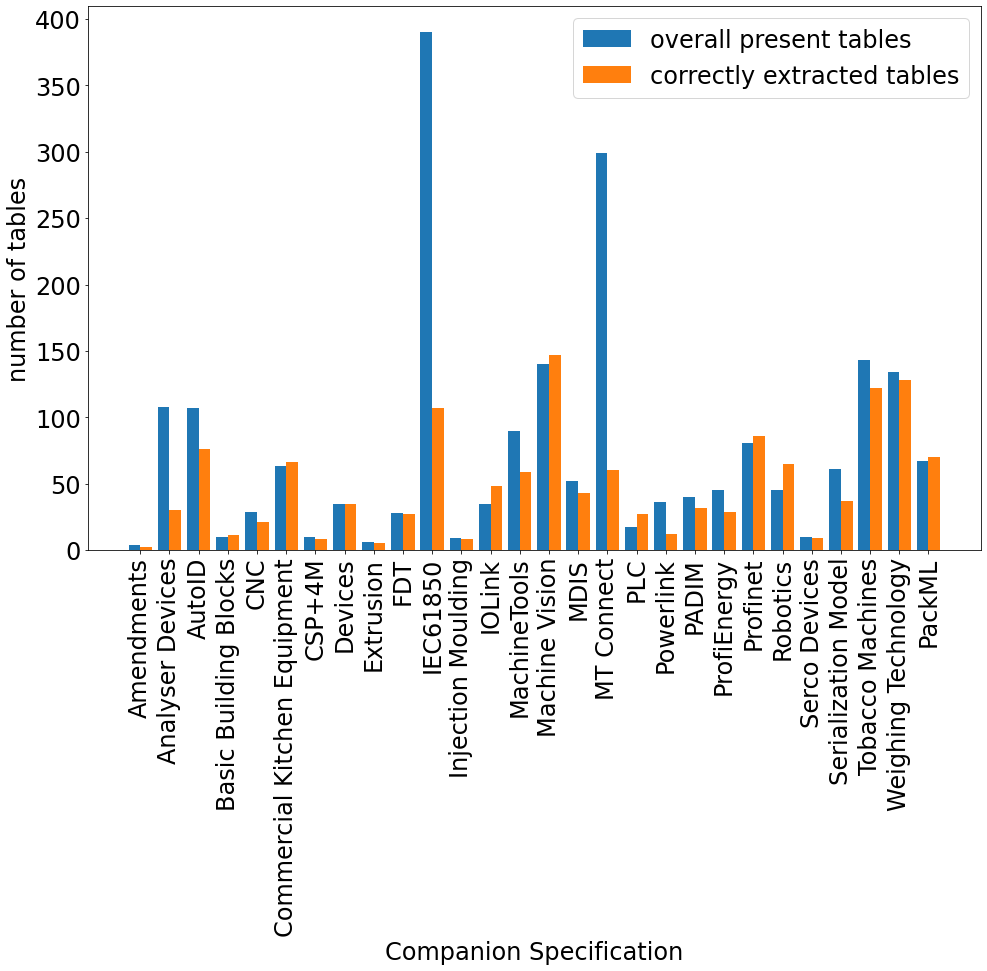

In [4]:
Specification = ['Amendments','Analyser Devices','AutoID','Basic Building Blocks','CNC',
     'Commercial Kitchen Equipment','CSP+4M','Devices','Extrusion','FDT','IEC61850',
     'Injection Moulding','IOLink','MachineTools','Machine Vision','MDIS','MT Connect',
     'PLC','Powerlink','PADIM','ProfiEnergy','Profinet','Robotics','Serco Devices',
     'Serialization Model','Tobacco Machines','Weighing Technology', 'PackML']
Y = [4,108,107,10,29,63,10,35,6,28,390,9,35,90,140,52,299,17,36,40,45,81,45,10,61,143,134,67] # Overall target tables present after manual counting
Z = [2,30,76,11,21,66,8,35,5,27,107,8,48,59,147,43,60,27,12,32,29,86,65,9,37,122,128,70] #Overall Correctly extracted target tables

plt.figure(figsize=(16,10))
font = {'size' : 24} # Change font size here
plt.rc('font', **font)

X_axis = np.arange(len(Specification))

plt.bar(X_axis - 0.2, Y, 0.4, label = 'overall present tables')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'correctly extracted tables')
  
plt.xticks(X_axis, Specification, rotation = 'vertical')
plt.xlabel("Companion Specification")
plt.ylabel("number of tables")
plt.legend()
plt.savefig("recall_extraction.png",bbox_inches='tight')
plt.show()

### 7.3.2 Error Analysis 

In [11]:
errors = pd.read_excel('7.3.2 Error Analysis.xlsx')
errors.head()

Companion Specification  Error 1   Error 2   Error 3  Error 4  Error 5  \
0              Amendments         1         0        0        0        1   
1        Analyser Devices         1         1        1        1        0   
2                  AutoID         1         1        0        1        0   
3   Basic Building Blocks         0         0        0        1        0   
4                     CNC         0         1        0        1        0   

   Error 6   
0         0  
1         1  
2         1  
3         0  
4         0

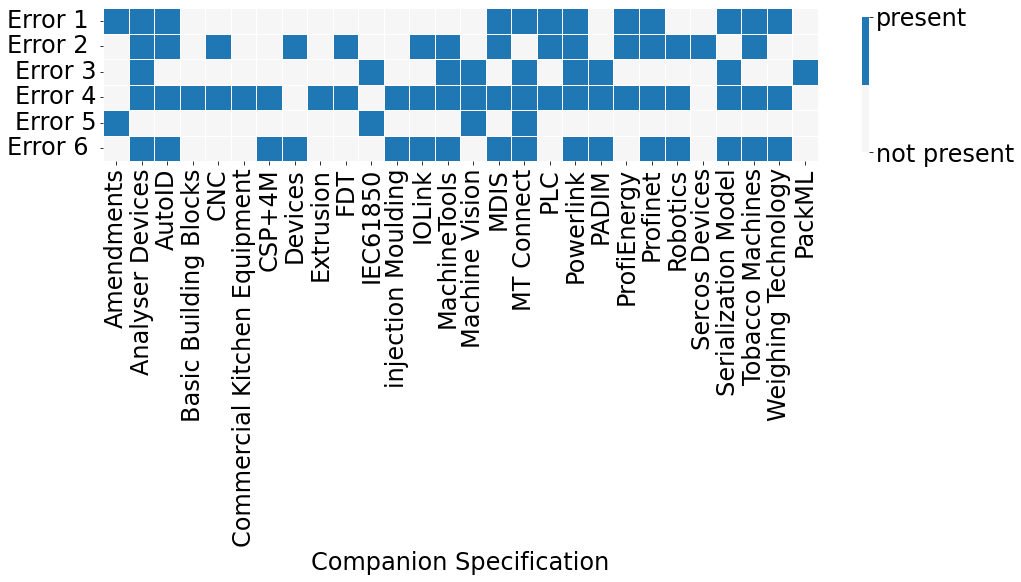

In [12]:
from matplotlib.colors import LinearSegmentedColormap

errors.set_index(['Companion Specification'],inplace=True)
errors = errors.T
plt.figure(figsize=(16,10))
font = {'size' : 24} # Change font size here
plt.rc('font', **font)
colors = ('#F7F6F7', '#1F77B4')
plt.yticks(rotation=0) 
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
ax = sns.heatmap(errors, annot=False, linewidths=1,cmap=cmap, square=True,cbar_kws={'ticks':[0, 1],'shrink': .25},linecolor='white')
cbar = ax.collections[0].colorbar
cbar.set_ticklabels(['not present', 'present'])
plt.savefig("errors_extraction.png",bbox_inches='tight')
plt.show()